# Importing Libraries

In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import string
from keras.optimizers import Adam
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount("drive")


# Selecting the Images and excluding the directories in the folder

### The Text file 'UsedSentences.txt' contains the output of the text in the Image and the name of the Image. The name of the image is used to extract the image from the directory and add it to our dataset.

## Train Data

No of Images : 1774
Characters :  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,*&!@~():`^]¢‘;|-«
No of chars : 82


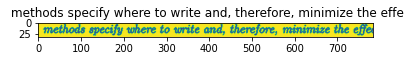

In [25]:
text_file=open(r"UsedSentences.txt","r")

details=[]
outputs=[]
names=[]
for line in text_file:
    a=line.split('#')
    outputs.append(a[1].strip('\n'))
    details.append(a[0])

for detail in details:
    a=detail.split(' ')
    names.append(a[0])
train_data=[]

for name in names:
    img=Image.open('drive/My Drive/CleanedImages/Encoder_Clean_Renamed/'+name+'.png','r')
    img = img.resize((784,32), Image.ANTIALIAS)
    img=np.asarray(img)
    img=img[:,:,0]
    train_data.append(img)

train_data=np.asarray(train_data)
plt.imshow(train_data[42])
plt.title(outputs[42])
print("No of Images :",train_data.shape[0])

symbols = " "+string.ascii_lowercase + string.ascii_uppercase+"0123456789.,*&!@~():`^]¢‘;|-«"
print("Characters :",symbols)
print("No of chars :",len(symbols))

## Test Data

No of Images : 1774
Characters :  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,*&!@~():`^]¢‘;|-«
No of chars : 82


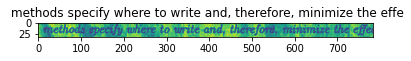

In [29]:
text_file=open(r"UsedSentences.txt","r")

det=[]
out=[]
nam=[]
for line in text_file:
    a=line.split('#')
    out.append(a[1].strip('\n'))
    det.append(a[0])

for detail in det:
    a=detail.split(' ')
    nam.append(a[0])
test_data=[]

for name in nam:
    img1=Image.open('drive/My Drive/DirtyImages/s01-000/'+name+'.png','r')   
    img1 = img1.resize((784,32), Image.ANTIALIAS)
    img1=np.asarray(img1)
    img1=img1[:,:,0]
    test_data.append(img1)

test_data=np.asarray(test_data)
plt.imshow(test_data[42])
plt.title(outputs[42])
print("No of Images :",test_data.shape[0])

symbols = " "+string.ascii_lowercase + string.ascii_uppercase+"0123456789.,*&!@~():`^]¢‘;|-«"
print("Characters :",symbols)
print("No of chars :",len(symbols))

# Creating a One Hot Encoded Array

### 98 is taken as the maximum number of Character in the Sentences. If the letter is present in the output then it is encoded to 1.

In [30]:
Y=np.zeros(shape=(len(outputs),98,len(symbols)))
for example_no,name in enumerate(outputs):
    for letter_no,letter in enumerate(name):
        try:
            Y[example_no][letter_no][symbols.index(letter)]=1
        except:
            print(letter,end=" ")

# Reshaping the array train_data[ ] and test_data[ ] to pass it to the convolution

In [31]:
train_data=np.reshape(train_data,(train_data.shape[0],train_data.shape[1],train_data.shape[2],1))
print("Shape of train_data is :",train_data.shape)

Shape of train_data is : (1774, 32, 784, 1)


In [32]:
test_data=np.reshape(test_data,(test_data.shape[0],test_data.shape[1],test_data.shape[2],1))
print("Shape of test_data is :",test_data.shape)

Shape of test_data is : (1774, 32, 784, 1)


# Building the Neural Network Model

In [33]:
def OCRModel():
    image=keras.layers.Input((32,784,1))
    conv1=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(image)

    mp1=keras.layers.MaxPooling2D((2,2),padding='same')(conv1)
    conv2=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(mp1)

    mp2=keras.layers.MaxPooling2D((2,2),padding='same')(conv2)
    conv3=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(mp2)

    mp3=keras.layers.MaxPooling2D((2,2),padding='same')(conv3)
    conv4=keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(mp3)

    mp4=keras.layers.MaxPooling2D((2,1),padding='same')(conv4)
    conv5=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp4)

    mp5=keras.layers.MaxPooling2D((2,1),padding='same')(conv5)
    conv6=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp5)


    bn=keras.layers.BatchNormalization()(conv6)
    sq=keras.backend.squeeze(bn,axis=1)

    rn1=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(sq)
    rn2=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(rn1)

    exd=keras.backend.expand_dims(rn2,axis=2)
    maping=keras.layers.Conv2D(len(symbols),(2,2),activation='relu',padding='same')(exd)
    maping=keras.backend.squeeze(maping,axis=2)
    maping = tf.keras.layers.Softmax()(maping)

    model=keras.Model(image,maping)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

# Understanding the filters in the model

## Seeing filters for the first hidden layer

In [45]:
OCR=OCRModel()
layer=OCR.layers
filters,biases= OCR.layers[1].get_weights()
print(layer[1].name,filters.shape)


conv2d_63 (3, 3, 1, 16)


# Plotting the filters

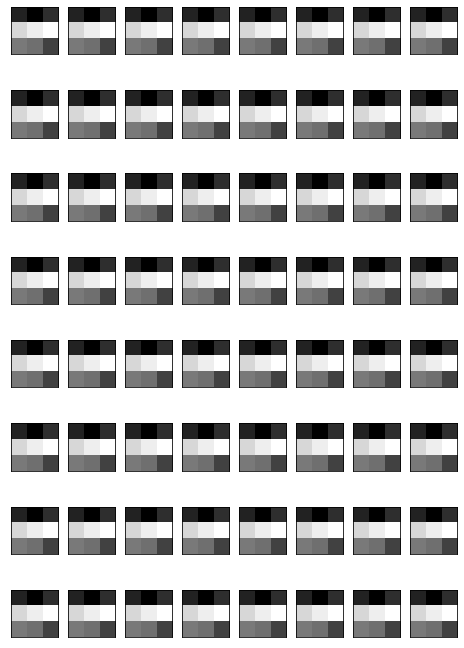

In [48]:
fig1=plt.figure(figsize=(8,12))
columns=8
rows=8
n_filters=columns*rows
for i in range(1, n_filters+1):
    f=filters[:,:,:,0]
    fig1=plt.subplot(rows,columns,i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:,:,0],cmap='gray')
plt.show()    



# Plotting the Model

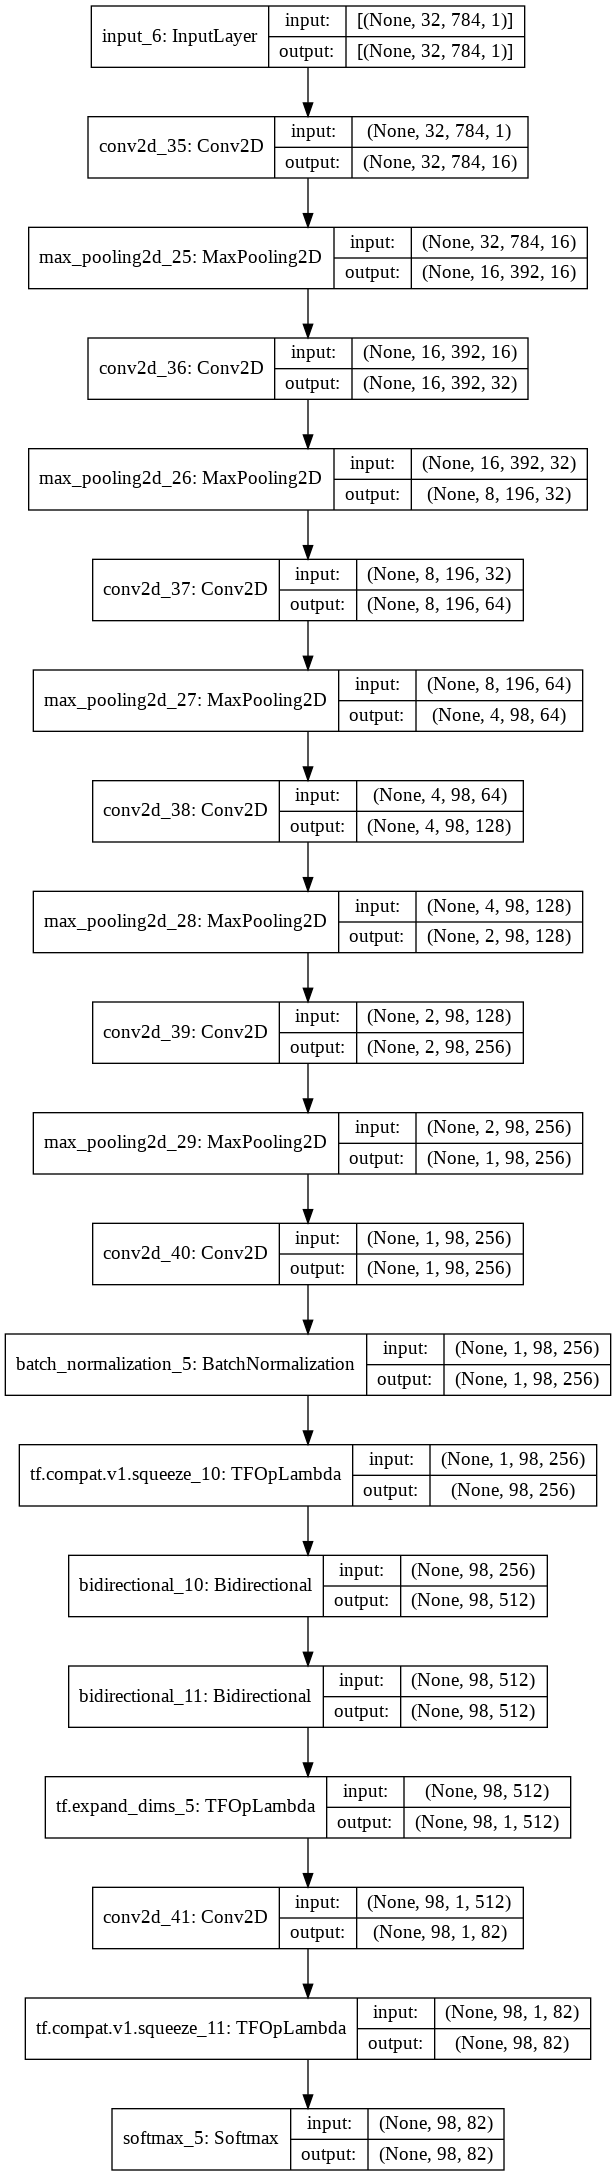

In [38]:
plot_model(OCR, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

# Training Accuracy


In [35]:
from keras.utils.vis_utils import plot_model
OCR=OCRModel()
OCR.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
OCR.fit(train_data, Y,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1774/1774 [==============================] - 879s 493ms/step - loss: 1.6213 - accuracy: 0.5481
Epoch 2/10
1774/1774 [==============================] - 874s 493ms/step - loss: 1.5948 - accuracy: 0.5718
Epoch 3/10
1774/1774 [==============================] - 902s 509ms/step - loss: 1.5205 - accuracy: 0.5436
Epoch 4/10
1774/1774 [==============================] - 902s 508ms/step - loss: 1.3146 - accuracy: 0.5810
Epoch 5/10
1774/1774 [==============================] - 905s 510ms/step - loss: 0.8585 - accuracy: 0.7247
Epoch 6/10
1774/1774 [==============================] - 907s 511ms/step - loss: 0.3968 - accuracy: 0.8793
Epoch 7/10
1774/1774 [==============================] - 905s 510ms/step - loss: 0.2113 - accuracy: 0.9360
Epoch 8/10
1774/1774 [==============================] - 905s 510ms/step - loss: 0.1841 - accuracy: 0.9441
Epoch 9/10
1774/1774 [==============================] - 902s 508ms/step - loss: 0.2184 - accuracy: 0.9334
Epoch 10/10
1774/1774 [=======================

### training acuuracy is 95.99%

# Model Accuracy on the test data

In [37]:
OCR.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
OCR.fit(test_data, Y,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1774/1774 [==============================] - 906s 508ms/step - loss: 1.8569 - accuracy: 0.5414
Epoch 2/10
1774/1774 [==============================] - 898s 506ms/step - loss: 1.5539 - accuracy: 0.5481
Epoch 3/10
1774/1774 [==============================] - 902s 508ms/step - loss: 1.4340 - accuracy: 0.5632
Epoch 4/10
1774/1774 [==============================] - 904s 509ms/step - loss: 1.1106 - accuracy: 0.6500
Epoch 5/10
1774/1774 [==============================] - 905s 510ms/step - loss: 0.6711 - accuracy: 0.7888
Epoch 6/10
1774/1774 [==============================] - 905s 510ms/step - loss: 0.3945 - accuracy: 0.8804
Epoch 7/10
1774/1774 [==============================] - 902s 508ms/step - loss: 0.2668 - accuracy: 0.9196
Epoch 8/10
1774/1774 [==============================] - 899s 507ms/step - loss: 0.2262 - accuracy: 0.9310
Epoch 9/10
1774/1774 [==============================] - 906s 511ms/step - loss: 0.1798 - accuracy: 0.9492
Epoch 10/10
1774/1774 [=======================

## Hence in epoch number 9 we can see that the highest accuracy achieved by testing the model on the test dataset is **94.92%** 